<img align="center" src="https://iili.io/3wI8gI.png" style="height:90px" style="width:30px"/>

# EDA Case study
Your task is to find interesting insights in the data that provides value to the stakeholders and visualize and communicate your insights in a clear manner. Follow to the PPDAC cycle when analyzing and visualizing the data. When you find an insight in a plot you write down key words that follows the setup-conflict-resolution framework.

### Examples of questions that could be intresting to investigate:
How has the buisness been performing over time?

Wich countries is the biggest and most profitable markets?

Any time of day that the sales are bigger?

Cost of shipping compared to sales?

Please come up with your own ideas that could be intresting to investigate. Don't get stuck on small details that wont bring any insights instead try to think "can this insight lead to the company taking any action that can increase sales, increase profitability or decrease cost?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("orders.csv")
df.head(5)

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit,Shipping_Country,Billing_Country,Order_Date,Timestamp
0,155464,1000001,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-15,17:08
1,187332,1000002,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,19:38
2,148175,1000003,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-03,07:44
3,159362,1000004,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-22,20:09
4,187395,1000005,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,21:26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682792 entries, 0 to 682791
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Order_ID                682792 non-null  int64  
 1   Customer_iD             682792 non-null  int64  
 2   Order_weight__g         578739 non-null  float64
 3   Shipping_fee_excl__VAT  682792 non-null  float64
 4   Total_amount_excl__VAT  682792 non-null  float64
 5   Profit_margin           665916 non-null  float64
 6   Profit                  665916 non-null  float64
 7   Shipping_Country        682788 non-null  object 
 8   Billing_Country         682788 non-null  object 
 9   Order_Date              682792 non-null  object 
 10  Timestamp               682792 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 57.3+ MB


In [4]:
df.describe()

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit
count,682792.000000,6.827920e+05,578739.000000,682792.000000,682792.000000,665916.000000,665916.000000
mean,465168.387153,1.278969e+06,1052.020609,14.666156,510.792087,0.642023,327.965248
std,210646.590910,1.657037e+05,1888.586736,21.337535,459.045080,0.089555,296.071651
min,100386.000000,1.000001e+06,6.000000,0.000000,0.000000,0.420000,0.000000
25%,282613.750000,1.135981e+06,90.000000,0.000000,262.690000,0.590000,165.107200
50%,465599.500000,1.275346e+06,192.000000,0.000000,385.500000,0.670000,247.757100
75%,647777.250000,1.418616e+06,1366.000000,41.802500,596.400000,0.700000,382.338000
max,829672.000000,1.577950e+06,150000.000000,1828.860000,20921.540000,0.830000,13367.200000


In [5]:
df.describe(include="O")

,Shipping_Country,Billing_Country,Order_Date,Timestamp
count,682788,682788,682792,682792
unique,34,34,747,1440
top,DE,DE,2020-05-26,21:24
freq,156910,156910,2840,1154


In [6]:
df.corr(numeric_only=True)

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit
Order_ID,1.000000,0.139162,0.105017,-0.045234,0.099414,-0.387792,0.035510
Customer_iD,0.139162,1.000000,-0.200280,0.683826,-0.265488,-0.047966,-0.263189
Order_weight__g,0.105017,-0.200280,1.000000,-0.295400,0.720296,-0.031346,0.704778
Shipping_fee_excl__VAT,-0.045234,0.683826,-0.295400,1.000000,-0.399911,-0.053005,-0.403347
Total_amount_excl__VAT,0.099414,-0.265488,0.720296,-0.399911,1.000000,-0.031543,0.975852
Profit_margin,-0.387792,-0.047966,-0.031346,-0.053005,-0.031543,1.000000,0.131003
Profit,0.035510,-0.263189,0.704778,-0.403347,0.975852,0.131003,1.000000


<Axes: >

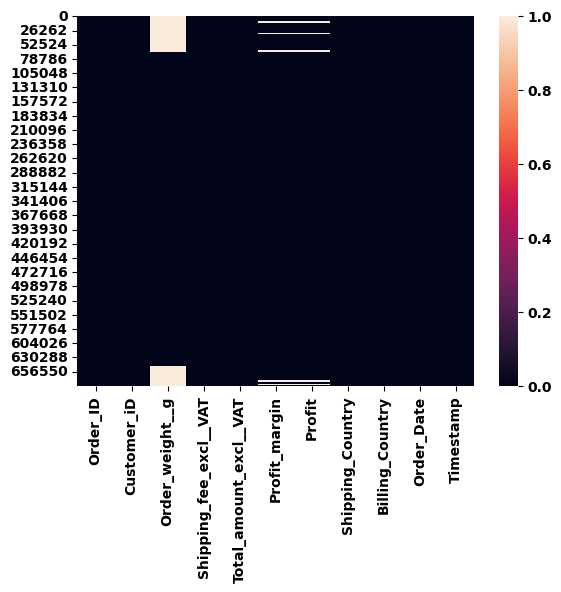

In [7]:
sns.heatmap(df.isna())

In [8]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"], format="%Y-%m-%d")
# df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M").dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682792 entries, 0 to 682791
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order_ID                682792 non-null  int64         
 1   Customer_iD             682792 non-null  int64         
 2   Order_weight__g         578739 non-null  float64       
 3   Shipping_fee_excl__VAT  682792 non-null  float64       
 4   Total_amount_excl__VAT  682792 non-null  float64       
 5   Profit_margin           665916 non-null  float64       
 6   Profit                  665916 non-null  float64       
 7   Shipping_Country        682788 non-null  object        
 8   Billing_Country         682788 non-null  object        
 9   Order_Date              682792 non-null  datetime64[ns]
 10  Timestamp               682792 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 57.3+ MB


In [9]:
df.loc[df["Profit"].isna()]

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit,Shipping_Country,Billing_Country,Order_Date,Timestamp
1537,114028,1001525,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-16,01:54
1538,104456,1001526,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-11-17,05:59
1539,110358,1001527,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-03,10:19
1540,110000,1001528,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-01,19:17
1541,112795,1001529,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-11,18:15
...,...,...,...,...,...,...,...,...,...,...,...
682009,110532,1577398,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-12-03,21:34
682010,105142,1577399,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-11-20,12:05
682011,113713,1577400,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-12-14,22:03
682012,114354,1577401,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-12-17,15:37


In [10]:
df.loc[df["Order_Date"].dt.year == 2018]

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit,Shipping_Country,Billing_Country,Order_Date,Timestamp
1537,114028,1001525,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-16,01:54
1538,104456,1001526,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-11-17,05:59
1539,110358,1001527,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-03,10:19
1540,110000,1001528,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-01,19:17
1541,112795,1001529,NaN,0.0,298.8,NaN,NaN,SE,SE,2018-12-11,18:15
...,...,...,...,...,...,...,...,...,...,...,...
682009,110532,1577398,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-12-03,21:34
682010,105142,1577399,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-11-20,12:05
682011,113713,1577400,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-12-14,22:03
682012,114354,1577401,NaN,39.2,188.6,NaN,NaN,SE,SE,2018-12-17,15:37


In [11]:
profit_by_date = df[df["Order_Date"].dt.year != 2018].copy()

In [12]:
profit_by_date["Order_Date"] = profit_by_date["Order_Date"] - pd.offsets.MonthBegin(0)
profit_by_date = profit_by_date.groupby("Order_Date")[["Profit"]].sum().reset_index()
profit_by_date

,Order_Date,Profit
0,2019-01-01,0.000000e+00
1,2019-02-01,3.640871e+06
2,2019-03-01,4.279912e+06
3,2019-04-01,4.953888e+06
4,2019-05-01,3.740342e+06
5,2019-06-01,4.169199e+06
6,2019-07-01,3.188892e+06
7,2019-08-01,4.524982e+06
8,2019-09-01,6.175651e+06
9,2019-10-01,6.386619e+06


In [13]:
df["Order_ID"].count()

682792

In [14]:
df["Customer_iD"].nunique()

577950

In [15]:
df["Total_amount_excl__VAT"].sum()

348764750.48999995

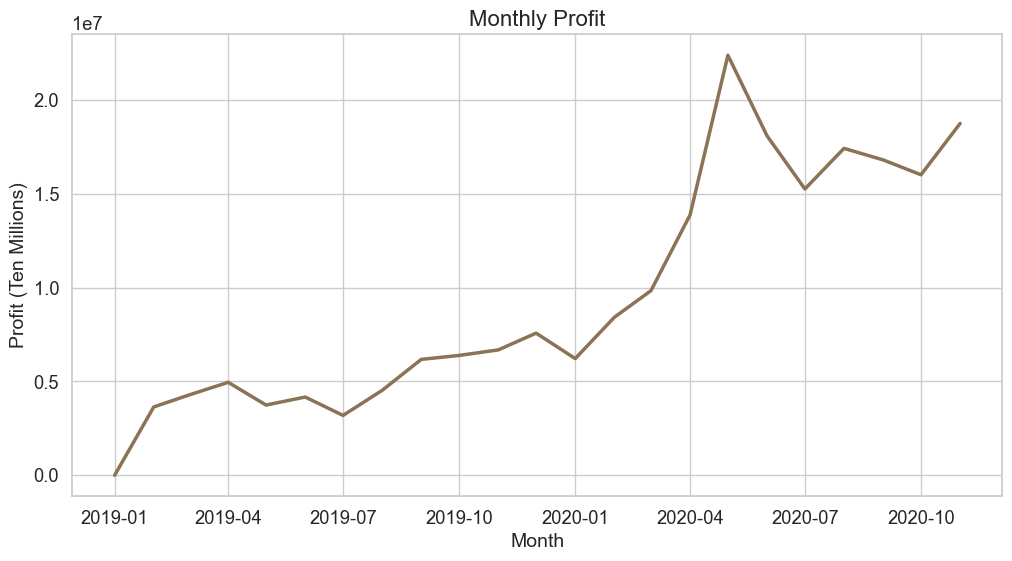

In [166]:

plt.rcParams.update({'font.size': 20})  # Установка размера шрифта

plt.figure(figsize=(12, 6))

plt.plot(profit_by_date['Order_Date'], profit_by_date['Profit'], color='#8B7355', linewidth=2.5)  # Увеличиваем толщину линии

plt.title('Monthly Profit', fontsize=16)  # Увеличиваем размер шрифта заголовка
plt.xlabel('Month', fontsize=14)  # Увеличиваем размер шрифта подписи оси X
plt.ylabel('Profit (Ten Millions)', fontsize=14)  # Увеличиваем размер шрифта подписи оси Y и добавляем указание на миллионы

plt.grid(True)
plt.savefig('monthly_growth_plot.png')
plt.show()

In [17]:
profit_growth_by_date = profit_by_date.copy()

In [18]:
profit_growth_by_date['Growth'] = profit_growth_by_date['Profit'].diff()

In [19]:
profit_growth_by_date

,Order_Date,Profit,Growth
0,2019-01-01,0.000000e+00,NaN
1,2019-02-01,3.640871e+06,3.640871e+06
2,2019-03-01,4.279912e+06,6.390411e+05
3,2019-04-01,4.953888e+06,6.739756e+05
4,2019-05-01,3.740342e+06,-1.213546e+06
5,2019-06-01,4.169199e+06,4.288575e+05
6,2019-07-01,3.188892e+06,-9.803071e+05
7,2019-08-01,4.524982e+06,1.336089e+06
8,2019-09-01,6.175651e+06,1.650670e+06
9,2019-10-01,6.386619e+06,2.109679e+05


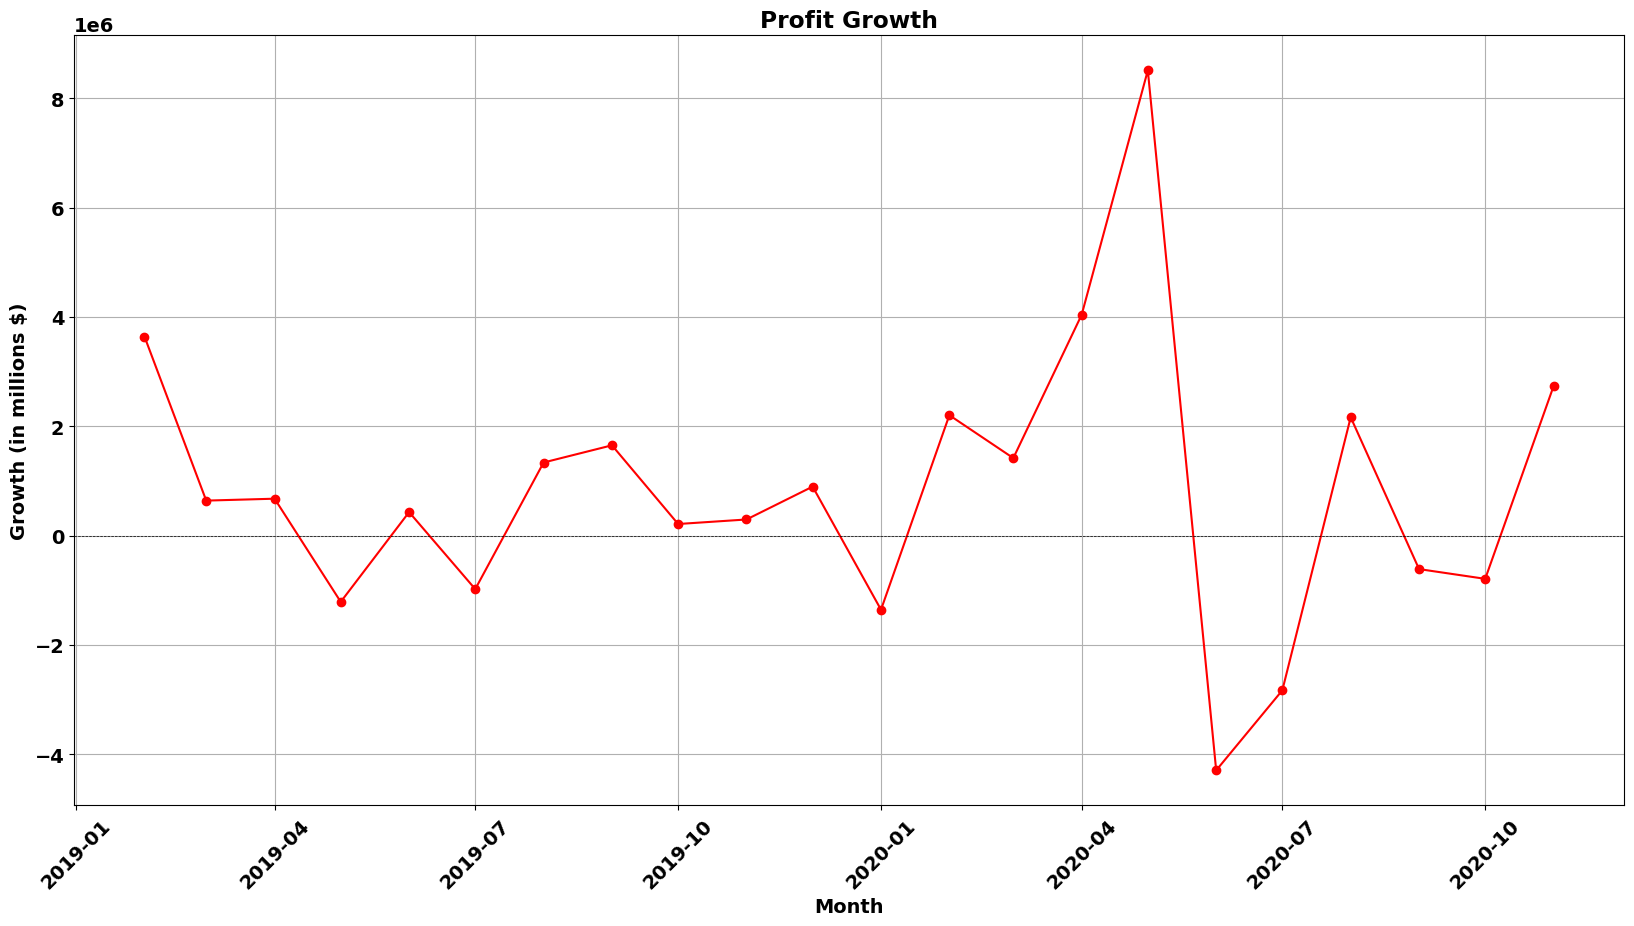

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(profit_growth_by_date['Order_Date'], profit_growth_by_date['Growth'], marker='o', color='red', linestyle='-')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.title('Profit Growth')
plt.xlabel('Month')
plt.ylabel('Growth (in millions $)')
plt.xticks(rotation=45)

plt.grid(True)
plt.savefig('profit_growth_plot.png')
plt.show()

In [21]:
profit_growth_by_date['% Growth'] = profit_growth_by_date['Profit'].pct_change() * 100
profit_growth_by_date

,Order_Date,Profit,Growth,% Growth
0,2019-01-01,0.000000e+00,NaN,NaN
1,2019-02-01,3.640871e+06,3.640871e+06,inf
2,2019-03-01,4.279912e+06,6.390411e+05,17.551875
3,2019-04-01,4.953888e+06,6.739756e+05,15.747417
4,2019-05-01,3.740342e+06,-1.213546e+06,-24.496836
5,2019-06-01,4.169199e+06,4.288575e+05,11.465731
6,2019-07-01,3.188892e+06,-9.803071e+05,-23.513078
7,2019-08-01,4.524982e+06,1.336089e+06,41.898227
8,2019-09-01,6.175651e+06,1.650670e+06,36.479035
9,2019-10-01,6.386619e+06,2.109679e+05,3.416124


In [22]:
from matplotlib.ticker import FuncFormatter

def format_y_ticks(value, tick_number):
    return '{:.0f}%'.format(value)

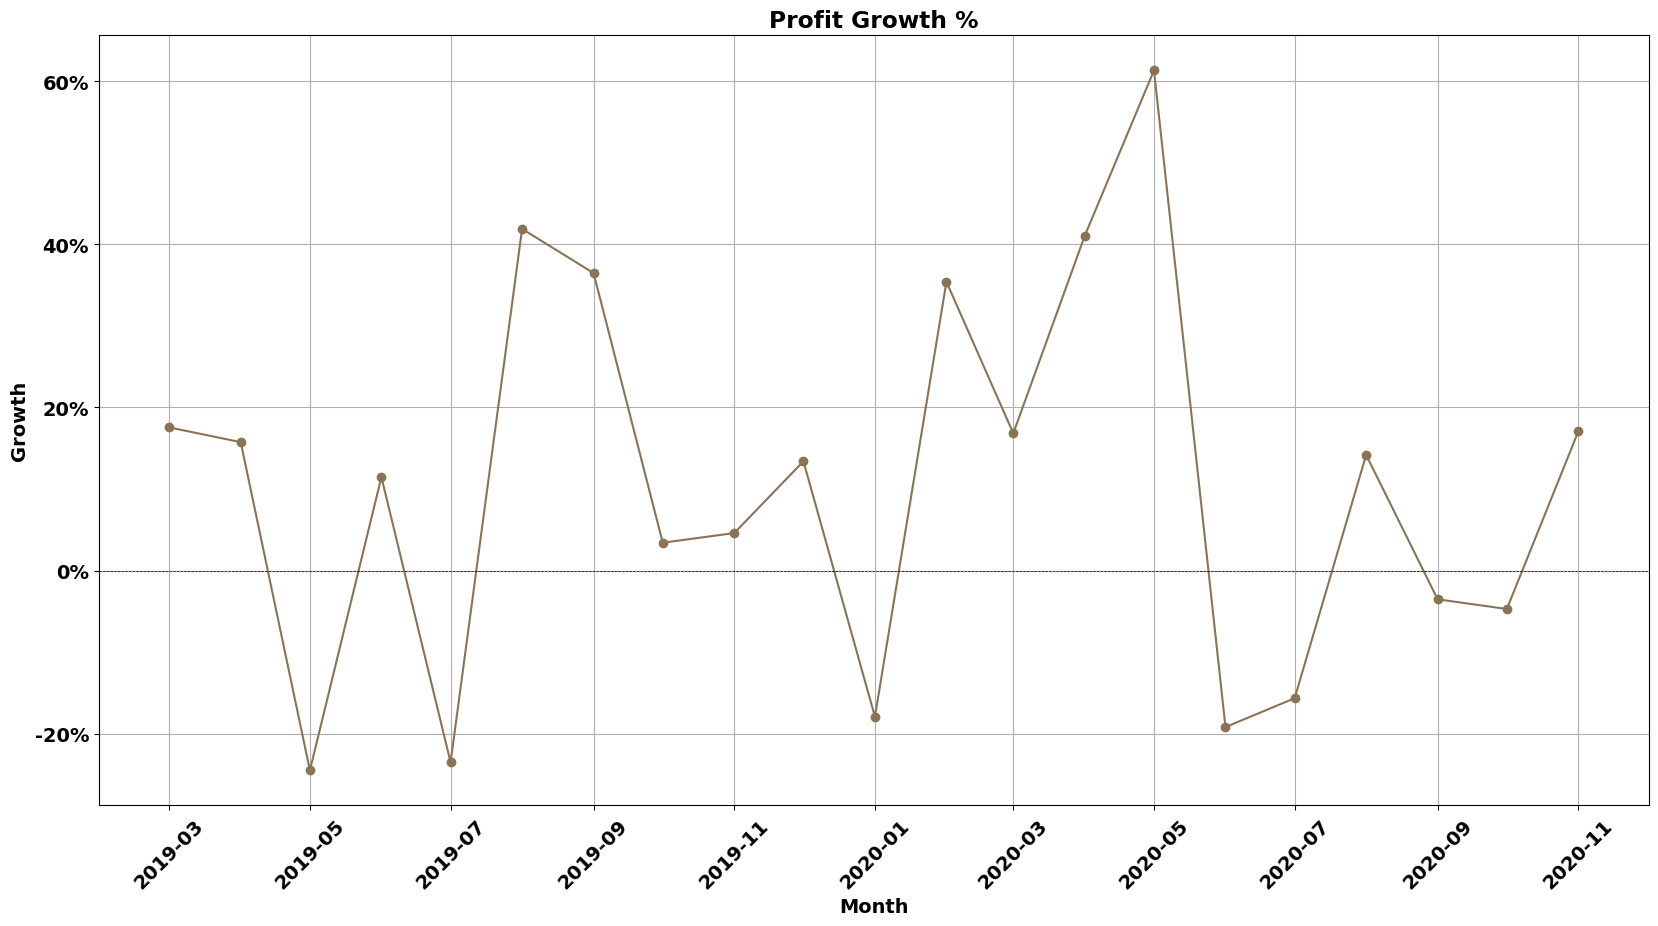

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(profit_growth_by_date['Order_Date'], profit_growth_by_date['% Growth'], marker='o', color='#8B7355', linestyle='-')  # Используем бежевый цвет и толщину шрифта 2.5
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.title('Profit Growth %')  # Увеличиваем размер шрифта заголовка
plt.xlabel('Month')  # Увеличиваем размер шрифта подписи оси X
plt.ylabel('Growth' )  # Увеличиваем размер шрифта подписи оси Y
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
plt.savefig('profit_growth_perc_plot.png')
plt.grid(True)
plt.show()

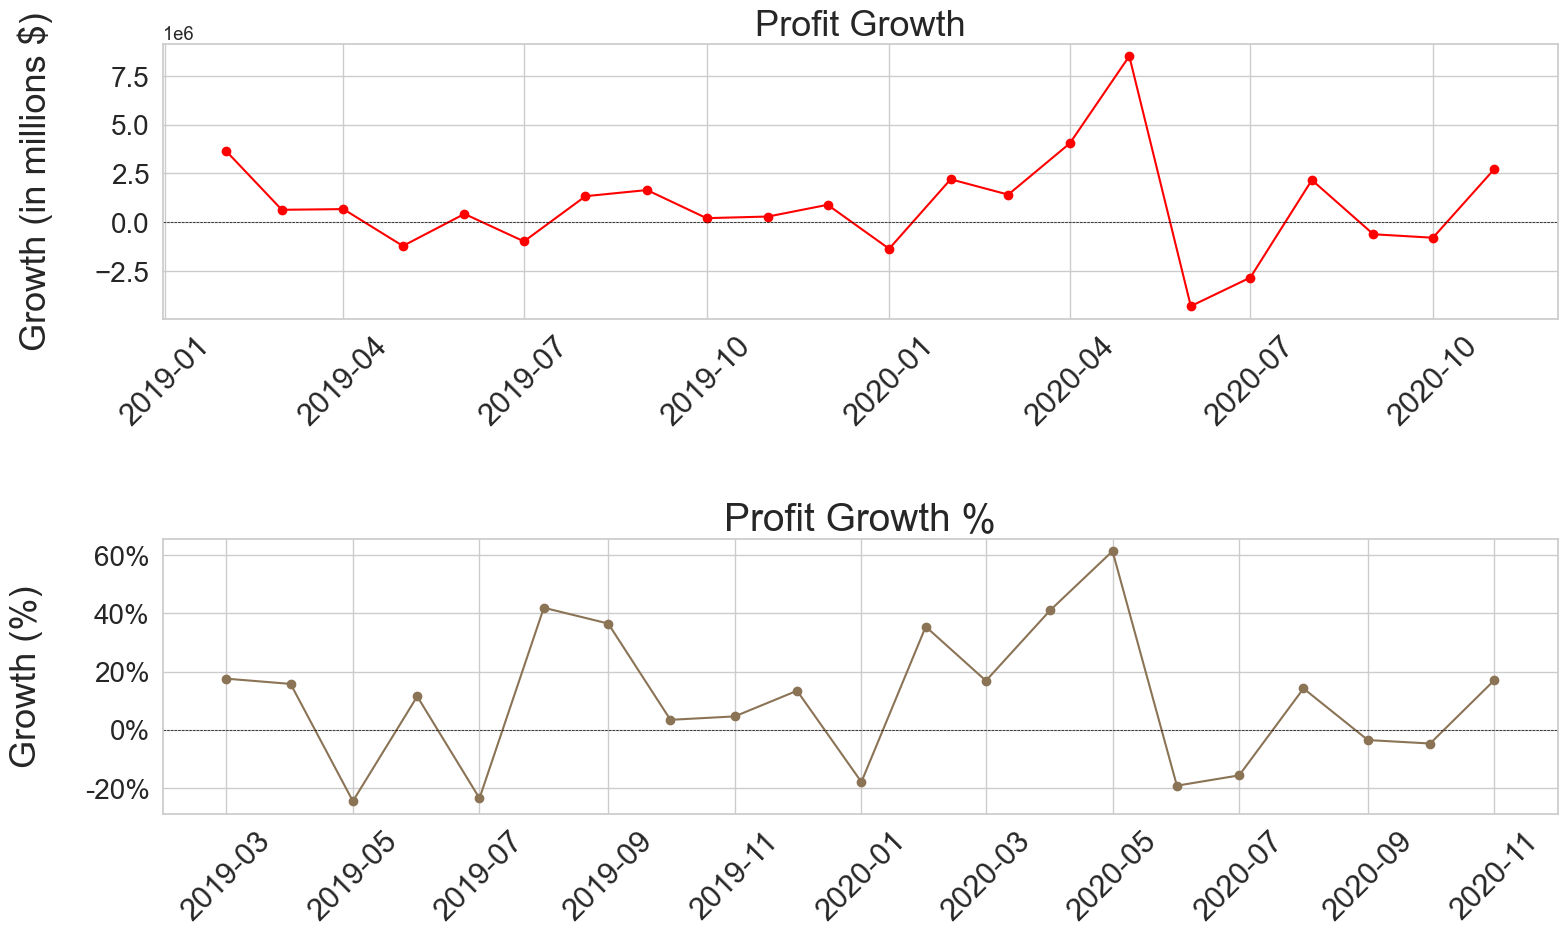

In [161]:

# Функция для форматирования меток оси Y в процентах
def format_y_ticks_percent(x, pos):
    return '{:.0f}%'.format(x)

plt.figure(figsize=(18, 10))

# График 1
plt.subplot(2, 1, 1)
plt.plot(profit_growth_by_date['Order_Date'], profit_growth_by_date['Growth'], marker='o', color='red', linestyle='-')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.title('Profit Growth', fontsize=26)
plt.ylabel('Growth (in millions $)', fontsize=26, labelpad=30)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=20)

plt.grid(True)

# График 2
plt.subplot(2, 1, 2)
plt.plot(profit_growth_by_date['Order_Date'], profit_growth_by_date['% Growth'], marker='o', color='#8B7355', linestyle='-')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.title('Profit Growth %', fontsize=28)
plt.ylabel('Growth (%)', fontsize=26, labelpad=30)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=20)

# Устанавливаем форматирование меток оси Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks_percent))

plt.grid(True)

# Увеличиваем расстояние между графиками
plt.subplots_adjust(hspace=0.8)

# Сохраняем объединенный график в файл
plt.savefig('profit_growth_combined_plot.png')
plt.show()

In [25]:
df = df[df["Order_Date"].dt.year != 2018].copy()

In [26]:
df["Order_Year"] = df["Order_Date"].dt.year
df

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit,Shipping_Country,Billing_Country,Order_Date,Timestamp,Order_Year
0,155464,1000001,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-15,17:08,2019
1,187332,1000002,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,19:38,2019
2,148175,1000003,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-03,07:44,2019
3,159362,1000004,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-22,20:09,2019
4,187395,1000005,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,21:26,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
682787,160125,1016360,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-03-24,16:40,2019
682788,150476,1577947,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-03-06,22:43,2019
682789,178355,1577948,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-05-03,13:23,2019
682790,178515,1577949,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-05-03,19:15,2019


In [66]:
df.groupby("Order_Year").count()

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit,Shipping_Country,Billing_Country,Order_Date,Timestamp
Order_Year,,,,,,,,,,,
2019,201702,201702,116175,201702,201702,201028,201028,201700,201700,201702,201702
2020,464890,464890,462564,464890,464890,464888,464888,464888,464888,464890,464890


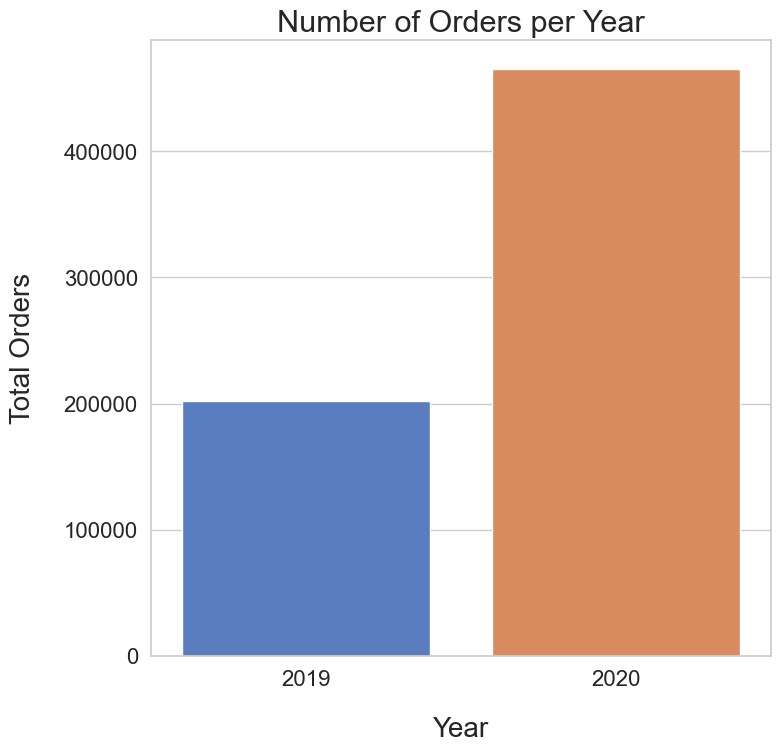

In [154]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Используем палитру "muted" с повышенной насыщенностью
custom_palette = sns.color_palette("muted", n_colors=5, desat=1)

plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Order_Year', palette=custom_palette)
plt.title('Number of Orders per Year', fontsize=22)  
plt.xlabel('Year', fontsize=20, labelpad=20)  
plt.ylabel('Total Orders', fontsize=20, labelpad=20)  
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.savefig('Orders_by_Year.png')
plt.show()


In [28]:
df[["Customer_iD"]].count()

Customer_iD    666592
dtype: int64

In [29]:
df[["Customer_iD"]].nunique()

Customer_iD    565436
dtype: int64

In [30]:
100 - (df[["Customer_iD"]].nunique() / df[["Customer_iD"]].count()) * 100

Customer_iD    15.1751
dtype: float64

In [31]:
perc_unique_cust_by_year = df.groupby("Order_Year")[["Customer_iD"]].count().rename(columns={"Customer_iD": "Total_Customers"})
perc_unique_cust_by_year["Unique_Customers"] = df.groupby("Order_Year")[["Customer_iD"]].nunique()
perc_unique_cust_by_year["Returning_Customers"] = perc_unique_cust_by_year["Total_Customers"] - perc_unique_cust_by_year["Unique_Customers"]
perc_unique_cust_by_year["Returning_Customers %"] = round(100 - (perc_unique_cust_by_year["Unique_Customers"] / perc_unique_cust_by_year["Total_Customers"]) * 100)
perc_unique_cust_by_year

,Total_Customers,Unique_Customers,Returning_Customers,Returning_Customers %
Order_Year,,,,
2019,201702,180895,20807,10.0
2020,464890,402568,62322,13.0


In [32]:
perc_unique_cust_by_year = perc_unique_cust_by_year.reset_index()
perc_unique_cust_by_year

,Order_Year,Total_Customers,Unique_Customers,Returning_Customers,Returning_Customers %
0,2019,201702,180895,20807,10.0
1,2020,464890,402568,62322,13.0


In [33]:
pie_2019_data = perc_unique_cust_by_year[perc_unique_cust_by_year["Order_Year"] == 2019]
labels = ["Total Orders", "Returning Customers"]
pie_2019_data

,Order_Year,Total_Customers,Unique_Customers,Returning_Customers,Returning_Customers %
0,2019,201702,180895,20807,10.0


In [34]:
pie_2020_data = perc_unique_cust_by_year[perc_unique_cust_by_year["Order_Year"] == 2020]
pie_2020_data

,Order_Year,Total_Customers,Unique_Customers,Returning_Customers,Returning_Customers %
1,2020,464890,402568,62322,13.0


In [35]:
sizes_2019 = pie_2019_data[["Total_Customers", "Returning_Customers"]].copy()
sizes_2019 = sizes_2019.unstack()
sizes_2019

Total_Customers      0    201702
Returning_Customers  0     20807
dtype: int64

In [36]:
sizes_2020 = pie_2020_data[["Total_Customers", "Returning_Customers"]].copy()
sizes_2020 = sizes_2020.unstack()
sizes_2020

Total_Customers      1    464890
Returning_Customers  1     62322
dtype: int64

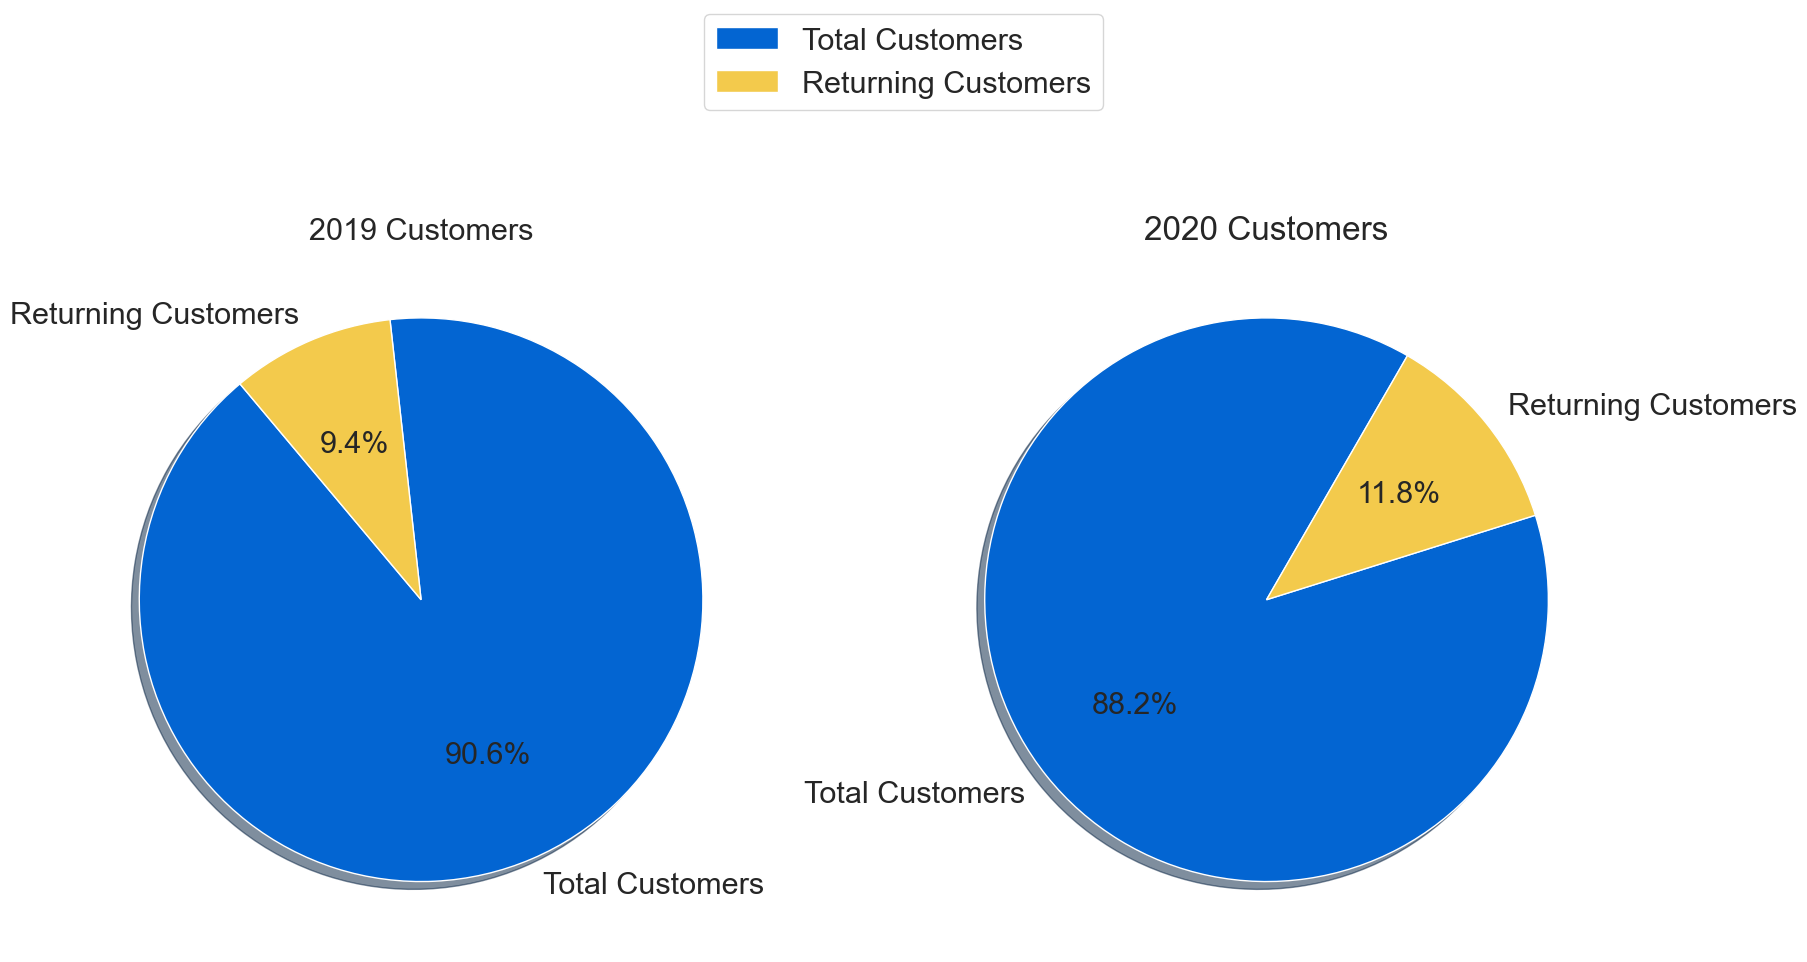

In [152]:

fig = plt.figure(figsize=(20, 12))
gs = GridSpec(1, 2, width_ratios=[1, 1])

# Первый пай-чарт
ax0 = plt.subplot(gs[0])
ax0.pie(sizes_2019, labels=labels, colors=colors, autopct="%1.1f%%", startangle=130, shadow=True, textprops={'fontsize': 22})
ax0.set_title("2019 Customers", fontsize=22)

# Второй пай-чарт
ax1 = plt.subplot(gs[1])
ax1.pie(sizes_2020, labels=labels, colors=colors, autopct="%1.1f%%", startangle=60, shadow=True, textprops={'fontsize': 22})
ax1.set_title("2020 Customers", fontsize=24)

# Создаем общую легенду
fig.legend(labels, loc='upper center', fontsize=22)
plt.savefig('Returning_customers_pie.png')
plt.show()

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit,Shipping_Country,Billing_Country,Order_Date,Timestamp,Order_Year
0,155464,1000001,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-15,17:08,2019
1,187332,1000002,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,19:38,2019
2,148175,1000003,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-03,07:44,2019
3,159362,1000004,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-22,20:09,2019
4,187395,1000005,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,21:26,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
682787,160125,1016360,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-03-24,16:40,2019
682788,150476,1577947,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-03-06,22:43,2019
682789,178355,1577948,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-05-03,13:23,2019
682790,178515,1577949,NaN,39.2,188.6,0.71,133.906,SE,SE,2019-05-03,19:15,2019


In [39]:
df.head(5)

,Order_ID,Customer_iD,Order_weight__g,Shipping_fee_excl__VAT,Total_amount_excl__VAT,Profit_margin,Profit,Shipping_Country,Billing_Country,Order_Date,Timestamp,Order_Year
0,155464,1000001,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-15,17:08,2019
1,187332,1000002,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,19:38,2019
2,148175,1000003,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-03,07:44,2019
3,159362,1000004,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-03-22,20:09,2019
4,187395,1000005,NaN,0.0,298.8,0.71,212.148,SE,SE,2019-05-23,21:26,2019


In [40]:
customers_by_countries = df.groupby("Shipping_Country").agg(
    Total_Customers_id=('Customer_iD', 'count'), 
    Unique_Customers_id=('Customer_iD', 'nunique') 
).reset_index()
customers_by_countries["Returning_Customers"] = customers_by_countries["Total_Customers_id"] - customers_by_countries["Unique_Customers_id"]
customers_by_countries["Returning_Customers %"] = round(100 - (customers_by_countries["Unique_Customers_id"] / customers_by_countries["Total_Customers_id"]) * 100)
customers_by_countries = customers_by_countries.sort_values(by="Total_Customers_id", ascending=False)
customers_by_countries

,Shipping_Country,Total_Customers_id,Unique_Customers_id,Returning_Customers,Returning_Customers %
8,DE,150370,123812,26558,18.0
30,SE,108694,90462,18232,17.0
14,GB,76421,65005,11416,15.0
9,DK,50317,42576,7741,15.0
24,NL,50197,43345,6852,14.0
13,FR,40816,36208,4608,11.0
27,PL,35964,31495,4469,12.0
25,NO,30297,25816,4481,15.0
12,FI,22359,19747,2612,12.0
33,US,21977,18696,3281,15.0


In [41]:
customers_by_countries = customers_by_countries.head(8).copy()
customers_by_countries

,Shipping_Country,Total_Customers_id,Unique_Customers_id,Returning_Customers,Returning_Customers %
8,DE,150370,123812,26558,18.0
30,SE,108694,90462,18232,17.0
14,GB,76421,65005,11416,15.0
9,DK,50317,42576,7741,15.0
24,NL,50197,43345,6852,14.0
13,FR,40816,36208,4608,11.0
27,PL,35964,31495,4469,12.0
25,NO,30297,25816,4481,15.0


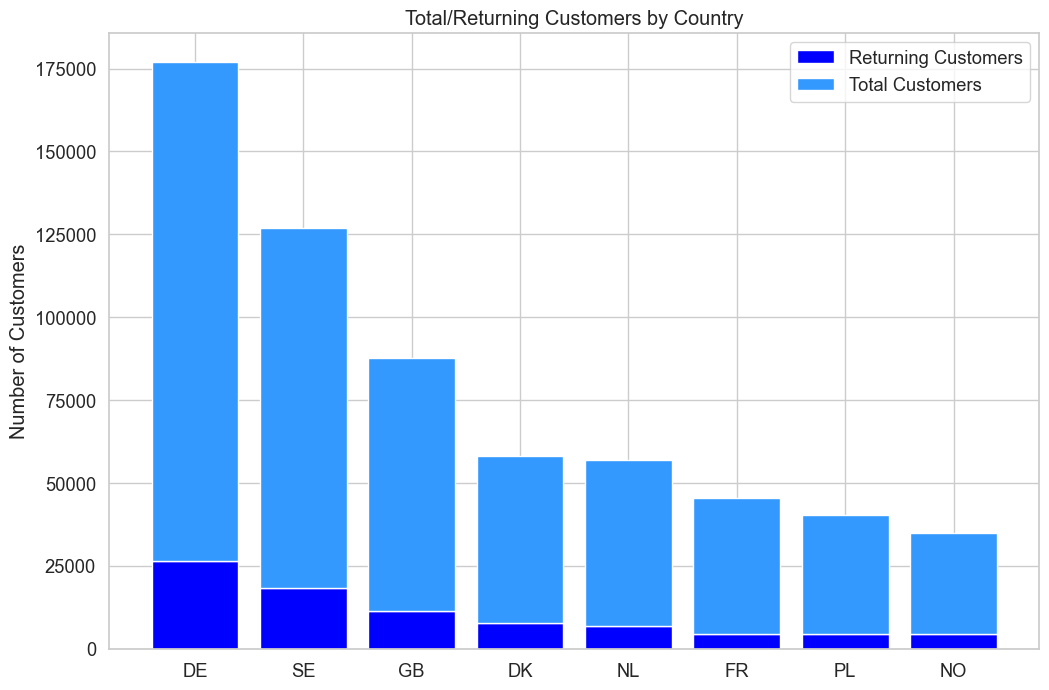

In [120]:
x = customers_by_countries['Shipping_Country']
total = customers_by_countries['Total_Customers_id']
returning = customers_by_countries['Returning_Customers']

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x, returning, label='Returning Customers', color="#0000FF", edgecolor="white")

ax.bar(x, total, bottom=returning, label='Total Customers', color="#3399FF", edgecolor="white")

ax.set_ylabel('Number of Customers')
ax.set_title('Total/Returning Customers by Country')
ax.legend()
plt.savefig('Orders_by_Year.png')
plt.show()